 # UJM - Master DSC/MLDM - Deep Learning - TP2c

> Indented block



 ##

## Keras with data from directories, small dataset, using pre-trained models, fine-tuning

Before our data are provided as numpy arrays and already normalized (same size). Now we move to a dataset with high resolution images (around 300 * 300) organized in folders.
- download bird dataset birds.zip on claroline

In [40]:
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Conv2D, Conv2DTranspose, Reshape, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Flatten, BatchNormalization, Dense, Dropout, Activation
from keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping


from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

This is an excerpt of CUB-200 dataset (http://www.vision.caltech.edu/visipedia/CUB-200.html), which contain 200 types of birds. Our sub-dataset contains 10 types of birds, each type contains around 50 images for training and 10 images for testing.

"https://www.vision.caltech.edu/visipedia/collage.jpg"

We face 3 problems here:
1. How to label the data?
2. How to feed images and their labels to the neural net?
3. How to normalize the size of the images (to feed to the input of the neural net)?

All these problems can be solved by ImageDataGenerator. Keras will run through whole directory 'birds/train' and get images and label each image from 0 to 9 by the subfolders containing it. Thus, the subfolders of train folder and test folder must be similar

**Problem 1. Use `flow_from_directory` method to train a NN with the dataset**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
train_datagen_init = ImageDataGenerator(rescale=1./255)

#we do not apply transformation to test data
test_datagen = ImageDataGenerator(rescale=1./255)

#train generator will generate data on the fly
train_generator_init = train_datagen_init.flow_from_directory('/content/drive/My Drive/birds/birds/train',
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode='categorical',color_mode='rgb')

#
test_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/birds/birds/test',
    target_size=(150, 150),
    color_mode="rgb",
    batch_size=1,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

##Note it is possible to define a validation generator for validation data,
#but the birds dataset does not contain validation data
#validation_datagen = ImageDataGenerator(rescale=1./255)
#
#validation_generator = validation_datagen.flow_from_directory(
#    'path/validation',
#    target_size=(150, 150),
#    color_mode="rgb",
#    batch_size=1,
#    class_mode='categorical',
#    shuffle=False,
#    seed=42
#)
#
#Then for the fit function
#model.fit(generator=train_generator_init,steps_per_epoch=4,
#        epochs=2, validation_data=validation_generator,
#                    validation_steps=10,epochs=10)

Found 479 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [9]:
## We now define the model
model = Sequential()
model.add(Dense(300, input_shape=(150,150,3), activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 150, 150, 300)  │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 150, 150, 300)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │        86,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │     8,294,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,401,638 (32.05 MB)

 Trainable params: 8,401,638 (32.05 MB)

 Non-trainable params: 0 (0.00 B)

None


In [10]:
#We train the model
history=model.fit(train_generator_init,steps_per_epoch=3, epochs=2)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
3/3 ━━━━━━━━━━━━━━━━━━━━ 68s 17s/step - accuracy: 0.0508 - loss: 2.5157
Epoch 2/2
3/3 ━━━━━━━━━━━━━━━━━━━━ 53s 18s/step - accuracy: 0.0938 - loss: 2.4351


In [ ]:
#We test
filenames = test_generator.filenames
nb_samples = len(filenames)

score = model.evaluate(test_generator,steps = nb_samples)
err = 100*(1-np.array(score))
print('Test error:',err[1],' Test loss:', err[0],'\n')

100/100 [==============================] - 26s 257ms/step - loss: 2.3117 - accuracy: 0.1000
Test error: 89.99999985098839  Test loss: -131.17246627807617 


**Problem 2. Use Data augmentation**


In [12]:
#We now augment the data
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,
                                   width_shift_range=0.2, height_shift_range=0.2)
#train generator we do data augmentation - note data augmentation on test
train_generator = train_datagen.flow_from_directory('/content/drive/My Drive/birds/birds/train',
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode='categorical',color_mode='rgb')

Found 479 images belonging to 10 classes.


In [13]:
#function for plotting images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        print(img.shape)
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)


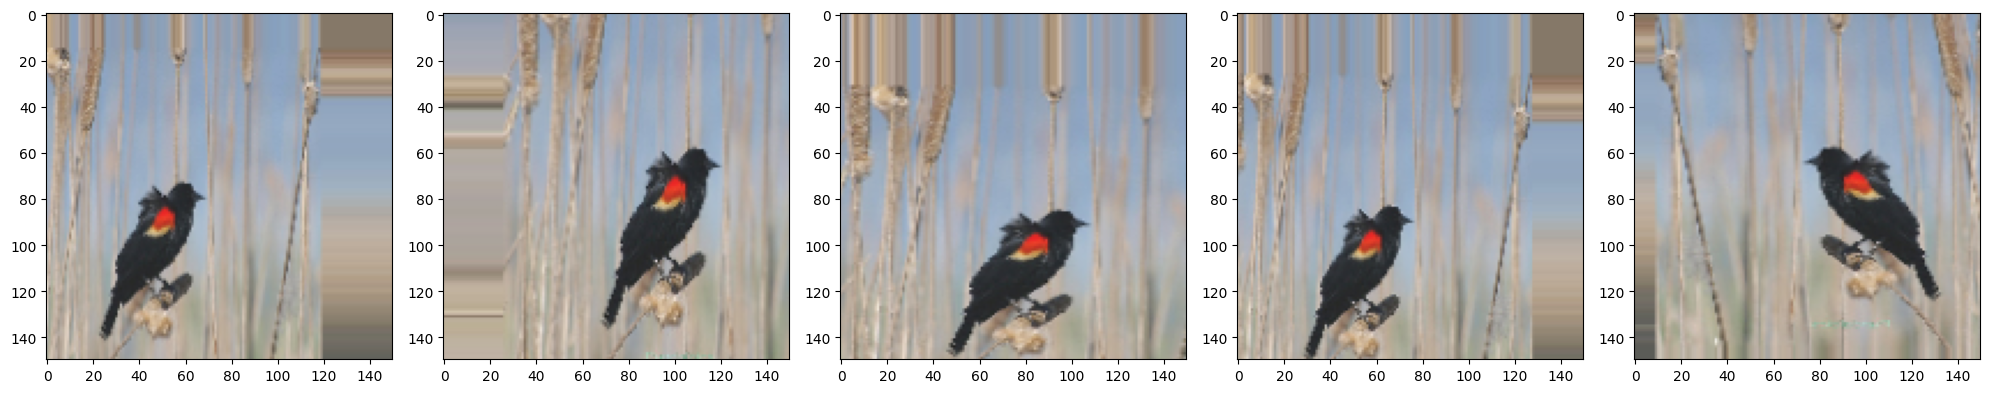

In [14]:
augmented_images = [train_generator[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [15]:
#We train the new model
history=model.fit(train_generator,steps_per_epoch=5,
        epochs=2,) #, epochs=50, batch_size=64)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
5/5 ━━━━━━━━━━━━━━━━━━━━ 99s 19s/step - accuracy: 0.0750 - loss: 2.3478
Epoch 2/2
5/5 ━━━━━━━━━━━━━━━━━━━━ 87s 17s/step - accuracy: 0.1008 - loss: 2.2970


In [17]:
#We evaluate on test
filenames = test_generator.filenames
nb_samples = len(filenames)

score = model.evaluate(test_generator,steps = nb_samples)
err = 100*(1-np.array(score))
print('Test error:',err[1],' Test loss:', err[0],'\n')

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 512ms/step - accuracy: 0.1471 - loss: 2.3179
Test error: 79.99999970197678  Test loss: -128.84314060211182 



**Problem 3. Use of pre-trained model**

In [33]:
#We import the DenseNet121 architecture
from tensorflow.keras.applications import DenseNet121

#we choose the weights learned from imagenet, we do not include the final (top)
#classification layer in order to tune it
base_model=DenseNet121(weights='imagenet',include_top=False)

#we add the additional output layers
additional_layer=base_model.output
additional_layer2=GlobalAveragePooling2D()(additional_layer)
additional_layer3=Dense(100,activation='relu')(additional_layer2)
predictions=Dense(10,activation='softmax')(additional_layer3)

model=Model(inputs=base_model.input,outputs=predictions)

#freeze weights of base model - you can actually freeze only the first layer
for layer in base_model.layers:
        layer.trainable = False
#Other equivalent option:
base_model.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_8    │ (None, None,      │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, None,      │      9,408 │ zero_padding2d_8… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, None,      │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, None,      │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_9    │ (None, None,      │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, None,      │          0 │ zero_padding2d_9… │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, None,      │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, None,      │          0 │ conv2_block1_0_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, None,      │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, None,      │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, None,      │          0 │ conv2_block1_1_b… │
│ (Activation)        │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, None,      │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, None,      │          0 │ pool1[0][0],      │
│ (Concatenate)       │ None, 96)         │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, None,      │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, None,      │          0 │ conv2_block2_0_b… │
│ (Activation)        │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, None,      │     12,288 │ conv2_block2_0_r

 Total params: 7,141,014 (27.24 MB)

 Trainable params: 103,510 (404.34 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

None


In [19]:
history=model.fit(train_generator,steps_per_epoch=5,
        epochs=2,)

Epoch 1/2
5/5 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.0941 - loss: 3.2789
Epoch 2/2
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.2017 - loss: 2.2839


In [20]:
filenames = test_generator.filenames
nb_samples = len(filenames)

score = model.evaluate(test_generator,steps = nb_samples)
err = 100*(1-np.array(score))
print('Test error:',err[1],' Test loss:', err[0],'\n')

100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 110ms/step - accuracy: 0.4509 - loss: 1.6750
Test error: 56.00000023841858  Test loss: -69.150710105896 



In [21]:
## example of use of early stopping - available for all fit functions
callback_earlystopping=EarlyStopping(monitor='loss', patience=2)
model.fit(train_generator,steps_per_epoch=10,
        epochs=1,callbacks=[callback_earlystopping])

10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.4385 - loss: 1.6304


In [22]:
score = model.evaluate(test_generator,steps = nb_samples)
err = 100*(1-np.array(score))
print('Test error:',err[1],' Test loss:', err[0],'\n')

100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.6933 - loss: 0.8573
Test error: 36.000001430511475  Test loss: -0.7483839988708496 



**Question: train the model, objective 99% of correct classification**
(augment epochs and iteration, tuning)

In [34]:
callback_earlystopping=EarlyStopping(monitor='loss', patience=2)
model.fit(train_generator,steps_per_epoch=10,
        epochs=30,callbacks=[callback_earlystopping])

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.2014 - loss: 2.8521
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.4973 - loss: 1.4012
Epoch 3/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.6980 - loss: 0.9881
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.7673 - loss: 0.6782
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.8056 - loss: 0.6241
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8094 - loss: 0.5401
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.8948 - loss: 0.3914
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8394 - loss: 0.4487
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.8705 - loss: 0.4088
Epoch 10/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 977ms/step - accuracy: 0.8958 - loss: 0.3035
Epoch 11/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.9241 - loss: 0.3033
Epoch 12/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.9356 - loss: 0.2232
Epoch 13/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9521 - loss: 0.2103
Epoch 14/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.9517 - loss: 0.

In [35]:
score = model.evaluate(test_generator,steps = nb_samples)
err = 100*(1-np.array(score))
print('Test error:',err[1],' Test loss:', err[0],'\n')

100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 111ms/step - accuracy: 0.9041 - loss: 0.1748
Test error: 12.000000476837158  Test loss: 76.85151696205139 



**Test other existing models**

In [41]:
from tensorflow.keras.applications import VGG16

# Instantiate the VGG16 model
base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add additional layers on top of the VGG16 base model
additional_layer_vgg = base_model_vgg.output
additional_layer2_vgg = GlobalAveragePooling2D()(additional_layer_vgg)
additional_layer3_vgg = Dense(100, activation='relu')(additional_layer2_vgg)
predictions_vgg = Dense(10, activation='softmax')(additional_layer3_vgg)

# Create the new model
model_vgg = Model(inputs=base_model_vgg.input, outputs=predictions_vgg)

# Print model summary to verify the architecture
print(model_vgg.summary())

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        51,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,766,998 (56.33 MB)

 Trainable params: 14,766,998 (56.33 MB)

 Non-trainable params: 0 (0.00 B)

None


In [42]:
for layer in base_model_vgg.layers:
    layer.trainable = False

model_vgg.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

print("VGG16 model with custom top layers compiled successfully. Base layers frozen.")

VGG16 model with custom top layers compiled successfully. Base layers frozen.


In [43]:
callback_earlystopping_vgg = EarlyStopping(monitor='loss', patience=2)
history_vgg = model_vgg.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=10,
    callbacks=[callback_earlystopping_vgg]
)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 89s 9s/step - accuracy: 0.0815 - loss: 2.3987
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.2693 - loss: 2.2149
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 87s 9s/step - accuracy: 0.3116 - loss: 2.1181
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.3663 - loss: 2.0607
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 86s 9s/step - accuracy: 0.4157 - loss: 1.9711
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.3912 - loss: 1.9365
Epoch 7/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 100s 9s/step - accuracy: 0.3912 - loss: 1.8614
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.5123 - loss: 1.7132
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 85s 9s/step - accuracy: 0.4912 - loss: 1.7068
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.5853 - loss: 1.5611


In [44]:
score = model_vgg.evaluate(test_generator,steps = nb_samples)
err = 100*(1-np.array(score))
print('Test error:',err[1],' Test loss:', err[0],'\n')

100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 280ms/step - accuracy: 0.5222 - loss: 1.5748
Test error: 48.00000190734863  Test loss: -56.3990592956543 



**Playgrounds**
In this section, we will play with online tools that help us visualize neural network training and convolution neural networks.

**1. TensorFlow Playground: https://playground.tensorflow.org**
The tensorflow playground will allow you to design and train a neural network with a graphical UI. You will be able to play with both classification and regression problems some synthetic datasets. Try to play with this tool and document any interesting insights that you observe.

Activation functions change the model's personality

- ReLU: Learns fast but creates sharp boundaries.

- tanh: Smoother boundaries, slower learning.

- Linear: Cannot capture non-linear patterns at all.


Effect of learning rate:

- Too small: the model learns too slow and never reaches good accuracy.

- Too big: the learning is too fast and it's hard to notice when it reached optimal accuracy


Some datasets are easy, some are unfairly hard

- Linear datasets: almost anything works.

- Spiral datasets: brutal unless the model is deep and non-linear.

- Checkerboard patterns: the model needs lots of neurons/features to understand the symmetry.

**2. Visualizing convolution neural networks: ** https://www.cs.cmu.edu/~aharley/vis/

In the above link you will find a tool to visualize the convolution neural networks, this tool contains 4 different convolution architectures, you can draw over the box on the top left and see the how the weights in the convolution neural network change with your input. Try to develop the intuition of convolution neural networks by playing with this tool and document your findings.

One good points to start is by understanding what kind of information is extracted at different layers of convolution neural network.

## Translate this notebook to pytorch

In [66]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

# Define data paths (assuming they are consistent with previous Keras setup)
train_dir = '/content/drive/My Drive/birds/birds/train'
test_dir = '/content/drive/My Drive/birds/birds/test'

# Define PyTorch transforms (minimal, reflecting Keras rescale and some augmentation)
train_transforms = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    # Note: Keras rescale=1./255 is handled by ToTensor(), no explicit normalize for 0-1 range needed
    # If ImageNet normalization is desired, add: transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, train_transforms)
test_dataset = datasets.ImageFolder(test_dir, test_transforms)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Load pre-trained DenseNet121
model_pt = models.densenet121(pretrained=True)

# Freeze all parameters in the pre-trained model
for param in model_pt.parameters():
    param.requires_grad = False

# Replace the classifier head for 10 classes
num_ftrs = model_pt.classifier.in_features
model_pt.classifier = nn.Sequential(
    nn.Linear(num_ftrs, 100), # Keras Dense(100, activation='relu')
    nn.ReLU(),
    nn.Linear(100, 10)     # Keras Dense(10, activation='softmax')
)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_pt = model_pt.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_pt.classifier.parameters(), lr=0.001) # Only optimize new head

# Training loop (minimal)
epochs = 2 # Keeping epochs low for quick demonstration

print("Starting PyTorch training...")
for epoch in range(epochs):
    model_pt.train() # Set model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_pt(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_accuracy:.2f}%")

print("Finished PyTorch training.")

# Evaluation loop (minimal)
model_pt.eval() # Set model to evaluation mode
correct_test = 0
total_test = 0
test_loss = 0.0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_pt(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_accuracy = 100 * correct_test / total_test
print(f"Test Loss: {test_loss/len(test_loader):.4f}, Test Acc: {test_accuracy:.2f}%")


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Starting PyTorch training...
Epoch 1/2, Loss: 1.9325, Train Acc: 39.04%
Epoch 2/2, Loss: 1.0826, Train Acc: 79.75%
Finished PyTorch training.
Test Loss: 0.9868, Test Acc: 80.00%
